In [1]:
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

import xarray as xr

In [2]:
parentdir = '../downloads/Dataset/linkfile2017-12'#'../data/first_net_dataset/origin/train/linkfile2017-12'  #'/home/ingrid/Documents/Exjobb/Dendrite/UserAreas/Ingrid/Dataset/'

time_diffs = []
file_list = []
for path, subdir, files in os.walk(parentdir):
    for file in files:    
        if file.endswith('.nc'):
            file_list.append(os.path.join(path,file))
            dataset = xr.open_dataset(os.path.join(path,file))
            dataset.close()
            
            gpm_in_str = dataset.attrs['gpm_time_in']
            gpm_in = datetime.datetime.strptime(gpm_in_str if len(gpm_in_str)==26 else gpm_in_str+'.000000', '%Y-%m-%d %H:%M:%S.%f')
            gpm_out_str = dataset.attrs['gpm_time_out']
            gpm_out = datetime.datetime.strptime(gpm_out_str if len(gpm_out_str)==26 else gpm_out_str+'.000000', '%Y-%m-%d %H:%M:%S.%f')
            gpm_mid = gpm_in + datetime.timedelta(seconds=(gpm_out-gpm_in).total_seconds()/2)
            
            goes_in_str = dataset.attrs['goes_time_in']
            goes_in = datetime.datetime.strptime(goes_in_str if len(goes_in_str)==26 else goes_in_str+'.000000', '%Y-%m-%d %H:%M:%S.%f')
            goes_out_str = dataset.attrs['goes_time_out']
            goes_out = datetime.datetime.strptime(goes_out_str if len(goes_out_str)==26 else goes_out_str+'.000000', '%Y-%m-%d %H:%M:%S.%f')
            goes_mid = goes_in + datetime.timedelta(seconds=(goes_out-goes_in).total_seconds()/2)

            time_diffs.append(np.abs((gpm_mid-goes_mid).total_seconds()))

In [3]:
time_diffs_np = np.array(time_diffs)
file_list_np = np.array(file_list)
diff_tol = 8*60 #5*60 
print('tolerance', diff_tol)
print('number of samples', len(file_list_np))
print('number of files exeeding time', len(file_list_np[np.where(time_diffs_np>diff_tol)]))

tolerance 480
number of samples 106
number of files exeeding time 0


In [4]:
np.save('time_diffs_np_2017-12-old.npy', time_diffs_np)
np.save('file_list_np_2017-12-old.npy', file_list_np)

In [5]:
for file in file_list_np[np.where(time_diffs_np>diff_tol)]:
    print(os.path.basename(file))
    dataset = xr.open_dataset(file)
    dataset.close()
    print(dataset)

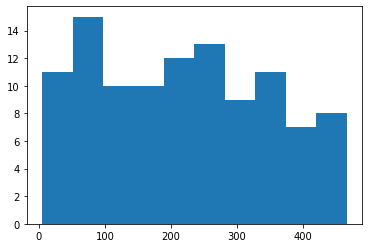

In [6]:
plt.hist(np.array(time_diffs), bins=10)
plt.show()

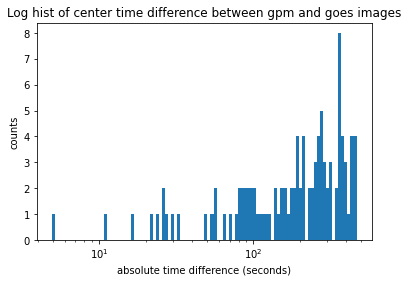

In [7]:


def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')
  plt.xlabel('absolute time difference (seconds)')
  plt.ylabel('counts')
  plt.title('Log hist of center time difference between gpm and goes images')

plot_loghist(time_diffs, 100)